In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from pcpca import PCPCA
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import utils

In [2]:
df = utils.read_toy_data()

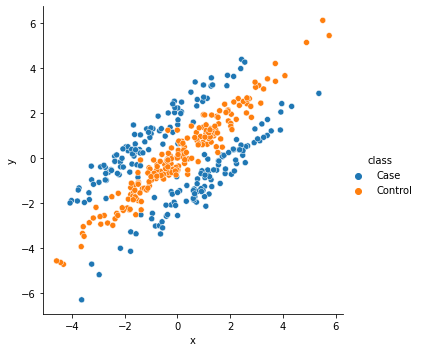

In [3]:
# Visualize data
sns.relplot(data = df, x = 'x', y = 'y', hue= 'class')

In [5]:
# Get projection vector from PCPCA
pcpca = PCPCA(gamma=0.7, n_components=1)
pcpca.fit(df[df['class'] == 'Case'][['x','y']].T, df[df['class'] == 'Control'][['x','y']].T)
z = pcpca.W_mle
df['proj'] = utils.project_along_vector(df[['x', 'y']].T, z).T

In [6]:
# Get projection vector from PCA
pca = PCA(n_components=1)
pca.fit(df[['x','y']])
z = pca.components_.T
df['proj'] = utils.project_along_vector(df[['x', 'y']].T, z).T

Text(0.5, 1.0, 'Histogram over the projection vector')

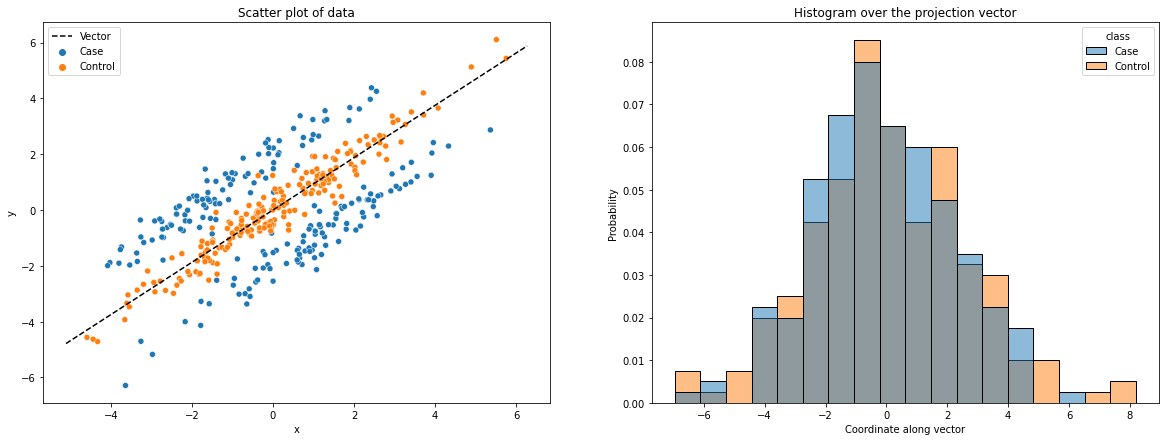

In [7]:
fig, axs = plt.subplots(1,2)
fig.set_size_inches(20,7)
sns.scatterplot(data = df, x = 'x', y = 'y', hue= 'class', ax = axs[0])
utils.plot_line(z, np.array([0,0]), axs[0],plot_kwargs={'linestyle':'dashed', 'color': 'black', 'label': 'Vector'})
axs[0].legend()
axs[0].set_title('Scatter plot of data')

sns.histplot(data = df, x = 'proj', hue = 'class', ax= axs[1], stat = 'probability')
axs[1].set_xlabel('Coordinate along vector')
axs[1].set_title('Histogram over the projection vector')


In [9]:
# Get projection vector from PCA
pca = PCA(n_components=1)
pca.fit(df[['x','y']])
pca_z = pca.components_.T
df['PCA'] = utils.project_along_vector(df[['x', 'y']].T, pca_z).T
# Get projection vector from PCPCA
pcpca = PCPCA(gamma=0, n_components=1)
pcpca.fit(df[df['class'] == 'Case'][['x','y']].T, df[df['class'] == 'Control'][['x','y']].T)
pcpca_z00 = pcpca.W_mle
df['PCPCA g=0.0'] = utils.project_along_vector(df[['x', 'y']].T, pcpca_z00).T
# Get projection vector from PCPCA
pcpca = PCPCA(gamma=0.4, n_components=1)
pcpca.fit(df[df['class'] == 'Case'][['x','y']].T, df[df['class'] == 'Control'][['x','y']].T)
pcpca_z04 = pcpca.W_mle
df['PCPCA g=0.4'] = utils.project_along_vector(df[['x', 'y']].T, pcpca_z04).T
# Get projection vector from PCPCA
pcpca = PCPCA(gamma=0.8, n_components=1)
pcpca.fit(df[df['class'] == 'Case'][['x','y']].T, df[df['class'] == 'Control'][['x','y']].T)
pcpca_z08 = pcpca.W_mle
df['PCPCA g=0.8'] = utils.project_along_vector(df[['x', 'y']].T, pcpca_z08).T

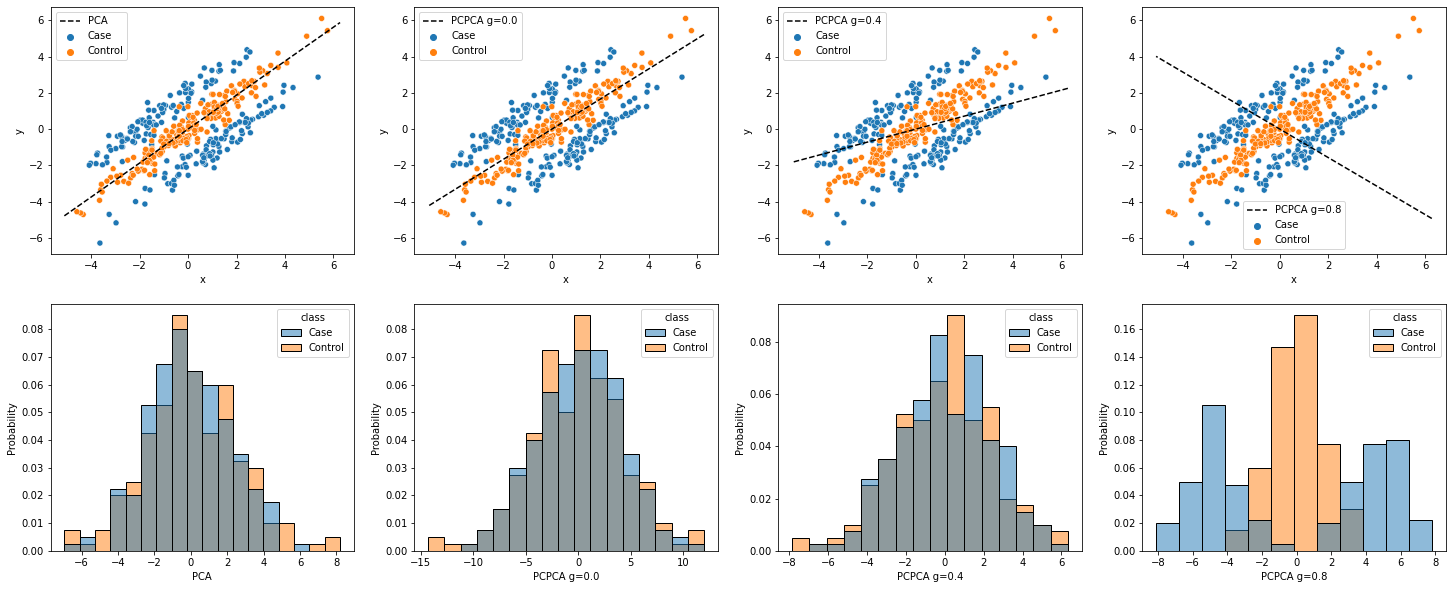

In [11]:
fig, axs = plt.subplots(2,4)
fig.set_size_inches(25,10)
ax = axs[0,0]
sns.scatterplot(data = df, x = 'x', y = 'y', hue= 'class', ax = ax)
utils.plot_line(pca_z, np.array([0,0]), ax ,plot_kwargs={'linestyle':'dashed', 'color': 'black', 'label': 'PCA'})
ax.legend()
ax = axs[0,1]
sns.scatterplot(data = df, x = 'x', y = 'y', hue= 'class', ax = ax)
utils.plot_line(pcpca_z00, np.array([0,0]), ax,plot_kwargs={'linestyle':'dashed', 'color': 'black', 'label': 'PCPCA g=0.0'})
ax.legend()
ax = axs[0,2]
sns.scatterplot(data = df, x = 'x', y = 'y', hue= 'class', ax = ax)
utils.plot_line(pcpca_z04, np.array([0,0]), ax,plot_kwargs={'linestyle':'dashed', 'color': 'black', 'label': 'PCPCA g=0.4'})
ax.legend()
ax = axs[0,3]
sns.scatterplot(data = df, x = 'x', y = 'y', hue= 'class', ax = ax)
utils.plot_line(pcpca_z08, np.array([0,0]), ax,plot_kwargs={'linestyle':'dashed', 'color': 'black', 'label': 'PCPCA g=0.8'})
ax.legend()

sns.histplot(data = df, x = 'PCA', hue = 'class', ax= axs[1,0], stat = 'probability')
sns.histplot(data = df, x = 'PCPCA g=0.0', hue = 'class', ax= axs[1,1], stat = 'probability')
sns.histplot(data = df, x = 'PCPCA g=0.4', hue = 'class', ax= axs[1,2], stat = 'probability')
sns.histplot(data = df, x = 'PCPCA g=0.8', hue = 'class', ax= axs[1,3], stat = 'probability')


fig.savefig('../media/pca_and_pcpca_projections.jpeg')